<a href="https://colab.research.google.com/github/varunbommagunta/CNN/blob/main/DogsAndCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 527M/543M [00:03<00:00, 250MB/s]
100% 543M/543M [00:03<00:00, 181MB/s]
 93% 253M/271M [00:01<00:00, 139MB/s]
100% 271M/271M [00:02<00:00, 138MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 88.4MB/s]


In [1]:
import os

In [ ]:
os.listdir("../content")

['.config',
 'kaggle.json',
 'test1.zip',
 'train.zip',
 'sampleSubmission.csv',
 'sample_data']

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("../content/train.zip") as zip:
    zip.extractall()
    print("Done extracting the training data")
    
with zipfile.ZipFile("../content/test1.zip") as zip:
    zip.extractall()
    print("Done extracting the testing data")

Done extracting the training data
Done extracting the testing data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
files = os.listdir("../content/train")
labels = []
for file in files:
    category = file.split(".")[0]
    if category == 'dog':
        labels.append(1)
    else:
        labels.append(0)
        
df = pd.DataFrame({
    'filename':files,
    'label':labels
})

In [ ]:
df.head()

,filename,label
0,dog.4906.jpg,1
1,dog.4543.jpg,1
2,dog.1554.jpg,1
3,dog.10854.jpg,1
4,dog.6068.jpg,1


In [ ]:
df.tail()

,filename,label
24995,cat.8789.jpg,0
24996,dog.4527.jpg,1
24997,dog.7601.jpg,1
24998,cat.10549.jpg,0
24999,dog.1367.jpg,1


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['label'].value_counts()

1    12500
0    12500
Name: label, dtype: int64

In [ ]:
from keras.preprocessing.image import load_img
import cv2

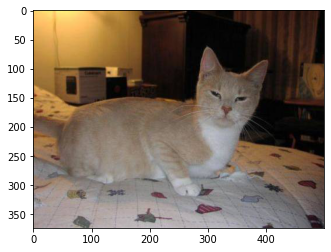

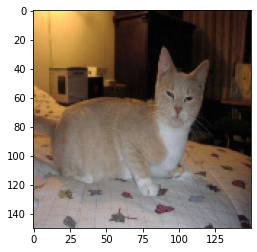

In [ ]:
sample = np.random.choice(files)
img = load_img("./train/"+sample)
np_img = np.asarray(img)
img = cv2.resize(np_img,(150,150))
plt.imshow(np_img)
plt.show()

plt.imshow(img)
plt.show()

In [ ]:
from keras.models import Sequential
import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape = (150,150,3),activation = 'relu'),
    #keras.layes.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(256,(3,3),activation = 'relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
    
    
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
df.head()

,filename,label
0,dog.4906.jpg,1
1,dog.4543.jpg,1
2,dog.1554.jpg,1
3,dog.10854.jpg,1
4,dog.6068.jpg,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['label'] = df['label'].replace({0:'cat',1:'dog'})

In [ ]:
train_df,validate_df = train_test_split(df,test_size = 0.20,random_state = 42)

In [ ]:
validate_df['label'].value_counts()

cat    2502
dog    2498
Name: label, dtype: int64

In [ ]:
train_df.head()

,filename,label
23311,dog.11117.jpg,dog
23623,cat.2643.jpg,cat
1020,dog.987.jpg,dog
12645,dog.4304.jpg,dog
1533,cat.1733.jpg,cat


In [ ]:
train_df = train_df.reset_index(drop=1)

In [ ]:
train_df.head()

,filename,label
0,dog.11117.jpg,dog
1,cat.2643.jpg,cat
2,dog.987.jpg,dog
3,dog.4304.jpg,dog
4,cat.1733.jpg,cat


In [ ]:
validate_df.head()

,filename,label
6868,dog.2856.jpg,dog
24016,cat.12226.jpg,cat
9668,dog.4691.jpg,dog
13640,cat.6622.jpg,cat
14018,dog.6570.jpg,dog


In [ ]:
validate_df = validate_df.reset_index(drop=1)

In [ ]:
validate_df.head()

,filename,label
0,dog.2856.jpg,dog
1,cat.12226.jpg,cat
2,dog.4691.jpg,dog
3,cat.6622.jpg,cat
4,dog.6570.jpg,dog


In [ ]:
#Training Generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
            rescale = 1.0/255.0,
            rotation_range = 44,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            height_shift_range = 0.2,
            width_shift_range = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
            train_df,
            "./train",
            x_col = 'filename',
            y_col = 'label',
            target_size = (150,150),
            class_mode = 'binary',
            batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
#Validation Generator

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
            validate_df,
            "./train",
            x_col = 'filename',
            y_col = 'label',
            target_size = (150,150),
            class_mode = 'binary',
            batch_size = 32)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [ ]:
import tensorflow as tf

In [ ]:
with tf.device("gpu:0"):
   print("tf.keras code in this scope will run on GPU")

tf.keras code in this scope will run on GPU


In [ ]:
#Training our model
history = model.fit_generator(
            train_generator,
            epochs = 16,
            validation_data = validation_generator,
            steps_per_epoch = total_train/batch_size,
            validation_steps = total_validate/batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/16
625/625 [==============================] - 189s 250ms/step - loss: 0.6851 - accuracy: 0.5375 - val_loss: 0.6552 - val_accuracy: 0.5480
Epoch 2/16
625/625 [==============================] - 154s 247ms/step - loss: 0.6415 - accuracy: 0.6330 - val_loss: 0.6148 - val_accuracy: 0.6434
Epoch 3/16
625/625 [==============================] - 154s 246ms/step - loss: 0.6080 - accuracy: 0.6683 - val_loss: 0.5153 - val_accuracy: 0.7470
Epoch 4/16
625/625 [==============================] - 154s 247ms/step - loss: 0.5520 - accuracy: 0.7202 - val_loss: 0.5123 - val_accuracy: 0.7448
Epoch 5/16
625/625 [==============================] - 155s 248ms/step - loss: 0.5302 - accuracy: 0.7346 - val_loss: 0.4244 - val_accuracy: 0.8062
Epoch 6/16
625/625 [==============================] - 156s 249ms/step - loss: 0.4827 - accuracy: 0.7678 - val_loss: 0.4101 - val_accuracy: 0.8168
Epoch 7/16
625/625 [==============================] - 155s 248ms/step - loss: 0.4501 - accuracy: 0.7874 - val_loss: 0.3527 -